# Numenta (Large univariate data )

# Imports 

In [63]:
import sys
sys.path.append('../') 
sys.path.append('../scripts')

from perception_nassir import Perception

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from scripts.utilities import plot_data, show_anomalies
from scripts.utilities import apply_methods

image_save_path = ''
image_save_switch = False

# NAB Data Corpus - real known cause

# Machine temperature system failure

In [64]:
machine_temp_sys_fail_path = "../data/machine_temperature_system_failure.csv"

machine_df = pd.read_csv(machine_temp_sys_fail_path, engine='c', parse_dates=['timestamp'])
machine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  22695 non-null  datetime64[ns]
 1   value      22695 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 354.7 KB


/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


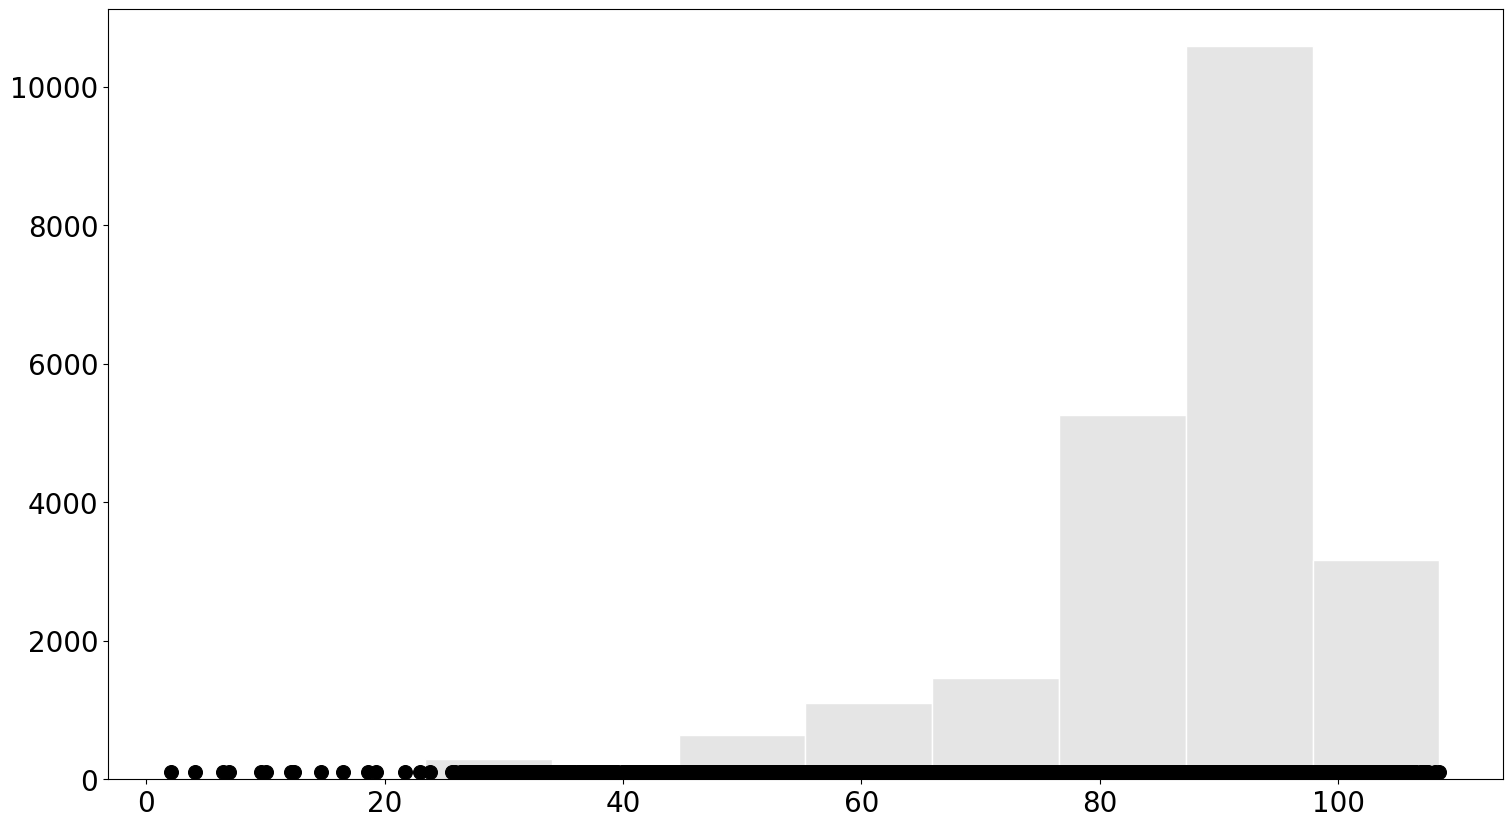

In [65]:
plot_data(machine_df['value'], balls_height=100)

/var/folders/h9/fky_jq090mz06d8w_73djt340000gn/T/ipykernel_9635/2492540733.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x="timestamp", y="value", data=machine_df, ci=None)
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


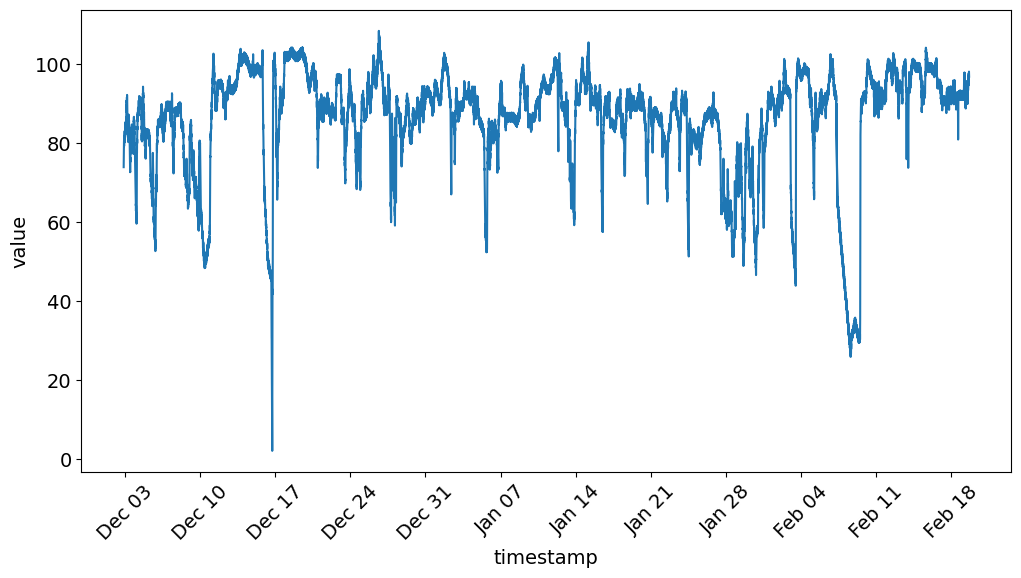

In [66]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.lineplot(x="timestamp", y="value", data=machine_df, ci=None)

# set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
# rotate the labels
ax.tick_params(axis='x', rotation=45)
# set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [67]:
# %% run outlier detectors
vals = np.array(machine_df['value'])
results = apply_methods(vals)


/Users/nassirmohammad/projects/anomaly_detection/perception-nassir/Notebooks/../scripts/utilities.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x=time_column, y=column_name, data=df, ci=None)
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


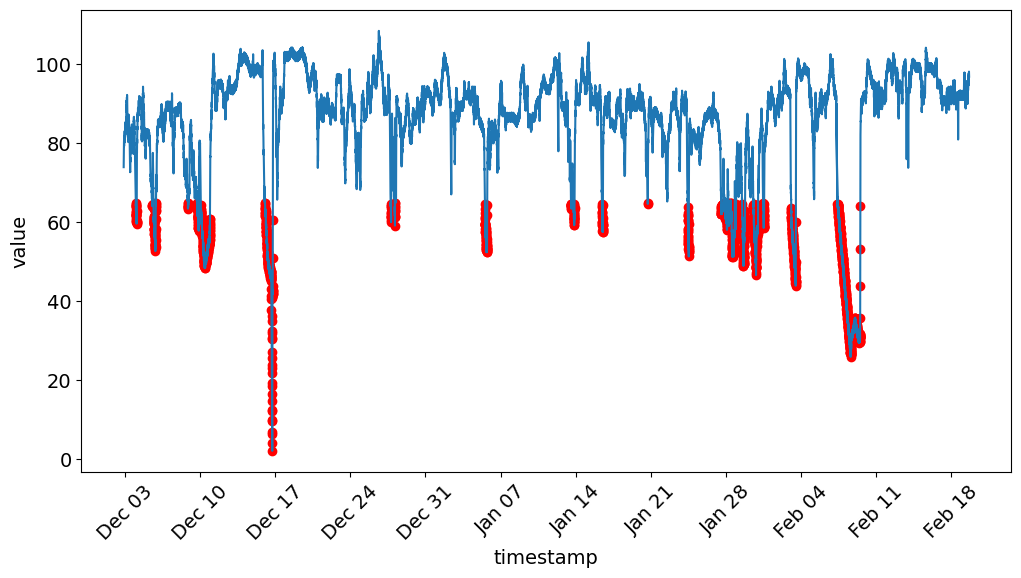

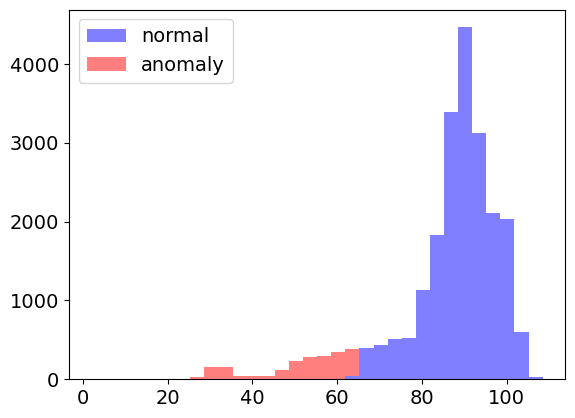

In [68]:
show_anomalies(machine_df, results, 'label_perception', alg_name='perception_method')

/Users/nassirmohammad/projects/anomaly_detection/perception-nassir/Notebooks/../scripts/utilities.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x=time_column, y=column_name, data=df, ci=None)
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


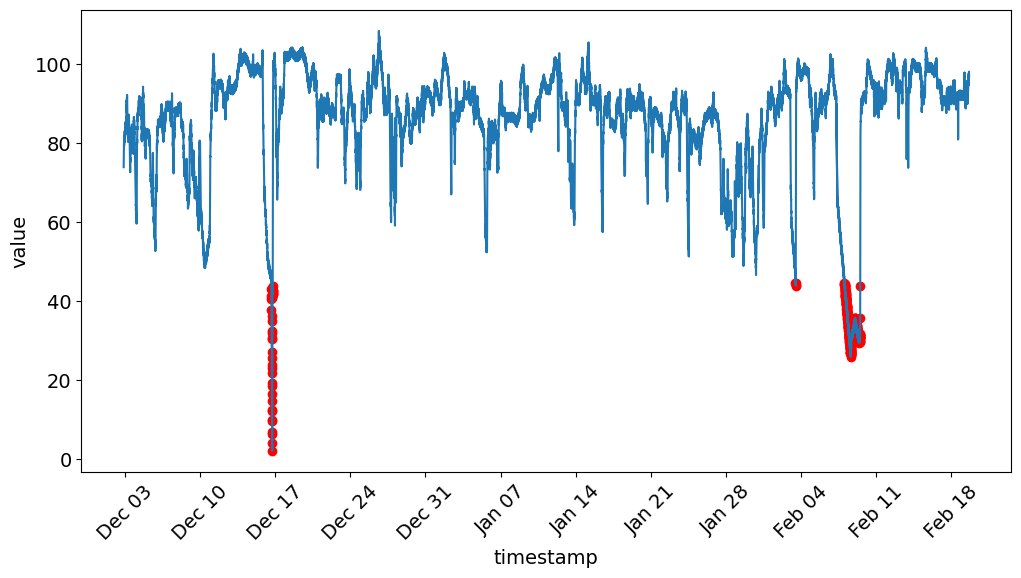

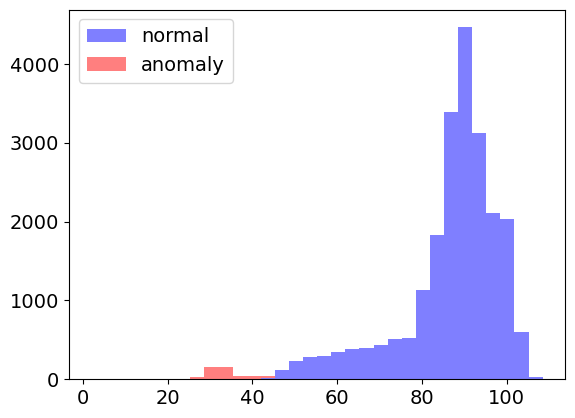

In [69]:
show_anomalies(machine_df, results, 'label_z_3', alg_name='z_score_3_method')

In [70]:
# assign labels to each data value using method output
label_names = ['label_perception', 'label_z_2.5', 'label_z_3', 'label_mad', 'label_iqr']
method_names = ['perception_method', 'z_score_2_5_method', 'z_score_3_method', 'mad_method', 'iqr_method']

for algorithm_label, alg_name in zip(label_names, method_names):
    machine_df[algorithm_label] = (machine_df['value'].isin(results.loc[alg_name])).astype(int)

In [71]:
column_name= 'value'

perception_threshold_max = machine_df.groupby('label_perception')[column_name].max()
z_threshold_25_max = machine_df.groupby('label_z_2.5')[column_name].max()
z_threshold_3_max = machine_df.groupby('label_z_3')[column_name].max()
mad_threshold_max = machine_df.groupby('label_mad')[column_name].max()
box_threshold_max = machine_df.groupby('label_iqr')[column_name].max()

perception_threshold_max[1], z_threshold_25_max[1], z_threshold_3_max[1], mad_threshold_max[1], box_threshold_max[1]

(64.95169952, 51.53678822, 44.67244412, 61.88615877, 66.67550497)

/var/folders/h9/fky_jq090mz06d8w_73djt340000gn/T/ipykernel_9635/2746429043.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x="timestamp", y="value", data=machine_df, ci=None)
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


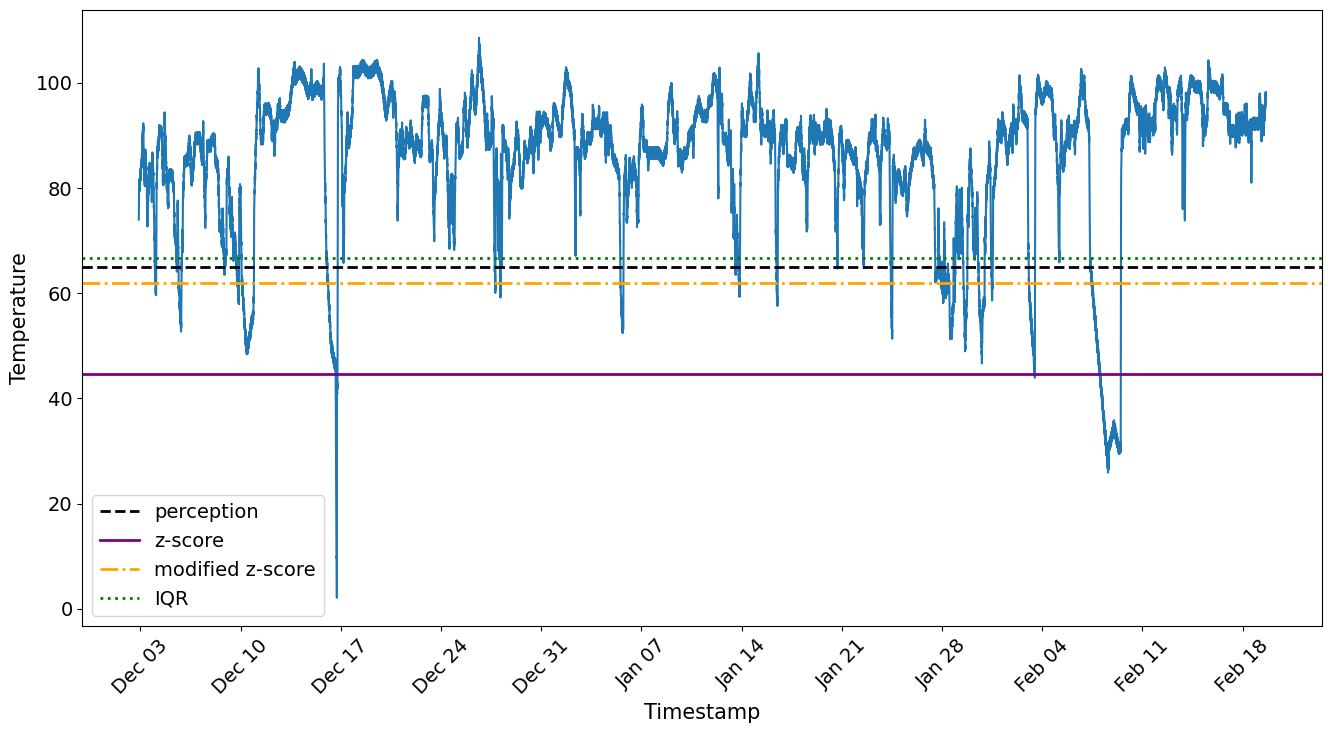

In [72]:
plt.rcParams["font.size"] = "14"

fig, ax = plt.subplots(figsize=(16,8))

ax = sns.lineplot(x="timestamp", y="value", data=machine_df, ci=None)

# rotate the labels
ax.tick_params(axis='x', rotation=45)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

ax.axhline(y=perception_threshold_max[1], linewidth=2, color='black', linestyle='--', label='perception')
ax.axhline(y=z_threshold_3_max[1], linewidth=2, color='purple', linestyle='-', label='z-score')
ax.axhline(y=mad_threshold_max[1], linewidth=2, color='orange', linestyle='-.', label='modified z-score')
ax.axhline(y=box_threshold_max[1], linewidth=2, color='green', linestyle=':', label='IQR')

ax.legend(loc='lower left')
#plt.title("Industrial machine temperature", fontsize=18);
plt.xlabel('Timestamp', fontsize=15)
plt.ylabel('Temperature', fontsize=15)

if image_save_switch is True:
    plt.savefig(image_save_path + 'machine_temperature.png');

/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


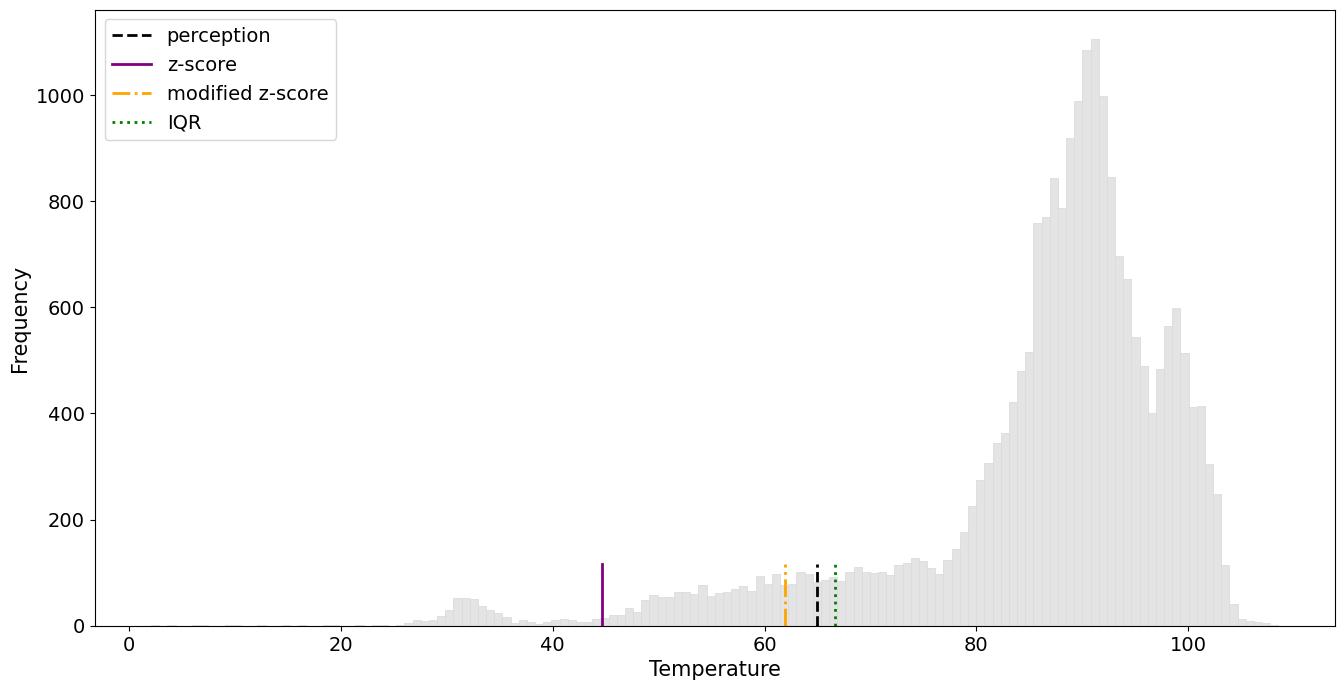

In [73]:
plt.rcParams["font.size"] = "14"

fig, ax = plt.subplots(figsize=(16, 8))

ax = sns.histplot(machine_df['value'], kde=False, color='gainsboro', edgecolor='gainsboro');

#ax.axvline(x=z_threshold_25_max[1], ymax = 0.1, linewidth=2, color='red', label='Z-score 2.5')
ax.axvline(x=perception_threshold_max[1], ymax = 0.1, linewidth=2, color='black', linestyle='--', label='perception')
ax.axvline(x=z_threshold_3_max[1], ymax = 0.1, linewidth=2, color='purple', linestyle='-', label='z-score')
ax.axvline(x=mad_threshold_max[1], ymax = 0.1, linewidth=2, color='orange', linestyle='-.', label='modified z-score')
ax.axvline(x=box_threshold_max[1], ymax = 0.1, linewidth=2, color='green', linestyle=':', label='IQR')

#ax.axvline(x=np.median(machine_df['value']), ymax = 0.1, linewidth=2, color='pink', label='Median')
ax.legend(loc='upper left');

#plt.title("Industrial machine temperature", fontsize=18);
plt.xlabel('Temperature', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

if image_save_switch is True:
    plt.savefig(image_save_path + 'machine_temperature_dist.png');

# Ambient temperature

In [74]:
ambient_path = "../data/ambient_temperature_system_failure.csv"

ambient_df = pd.read_csv(ambient_path, engine='c', parse_dates=['timestamp'])
ambient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  7267 non-null   datetime64[ns]
 1   value      7267 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 113.7 KB


/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


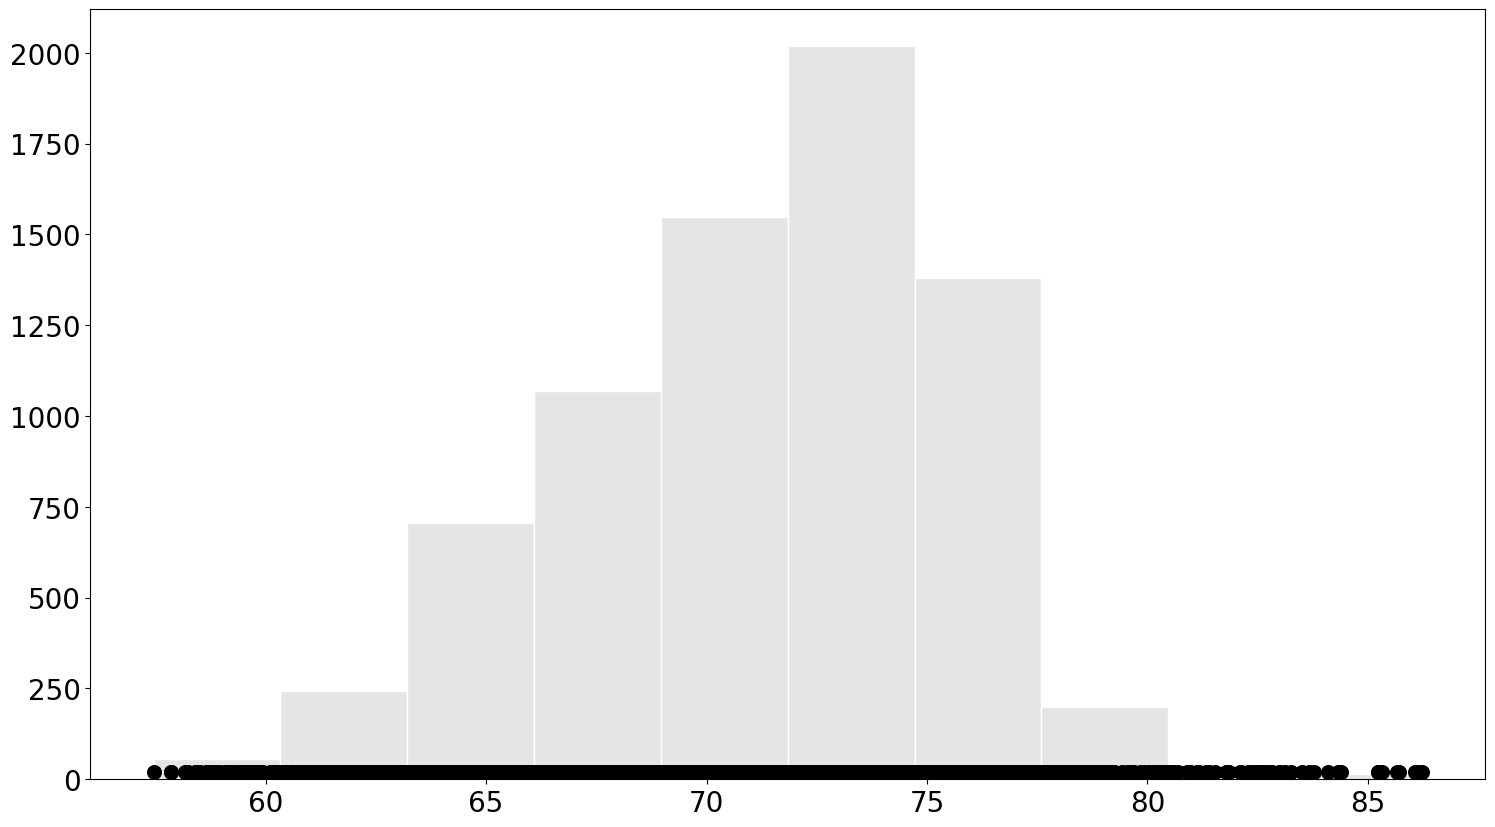

In [75]:
plot_data(ambient_df['value'], balls_height=20)

/var/folders/h9/fky_jq090mz06d8w_73djt340000gn/T/ipykernel_9635/1958358514.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x="timestamp", y="value", data=ambient_df, ci=None)
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


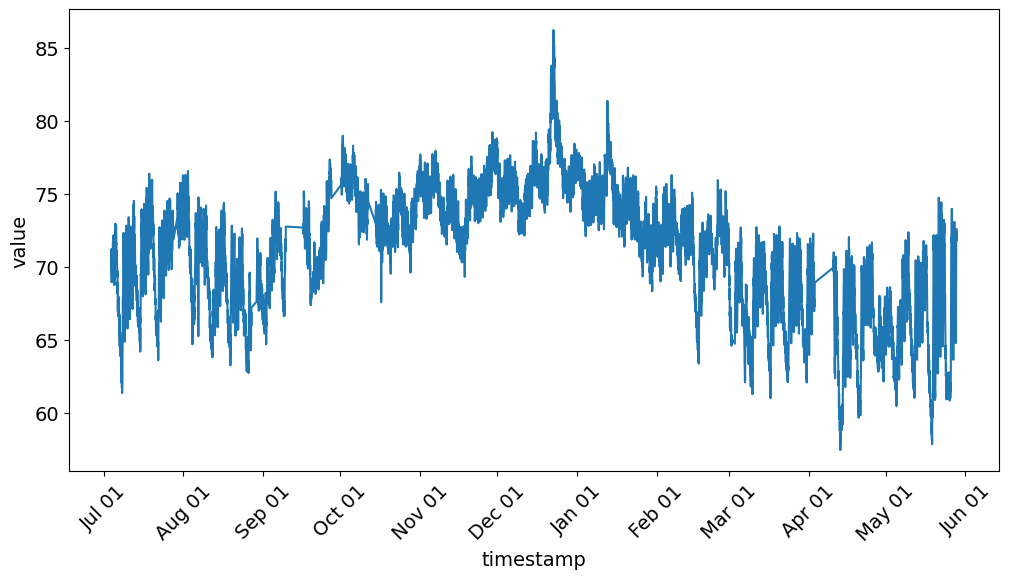

In [76]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.lineplot(x="timestamp", y="value", data=ambient_df, ci=None)

# rotate the labels
ax.tick_params(axis='x', rotation=45)
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [77]:
vals = np.array(ambient_df['value'])
results = apply_methods(vals)

/Users/nassirmohammad/projects/anomaly_detection/perception-nassir/Notebooks/../scripts/utilities.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x=time_column, y=column_name, data=df, ci=None)
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


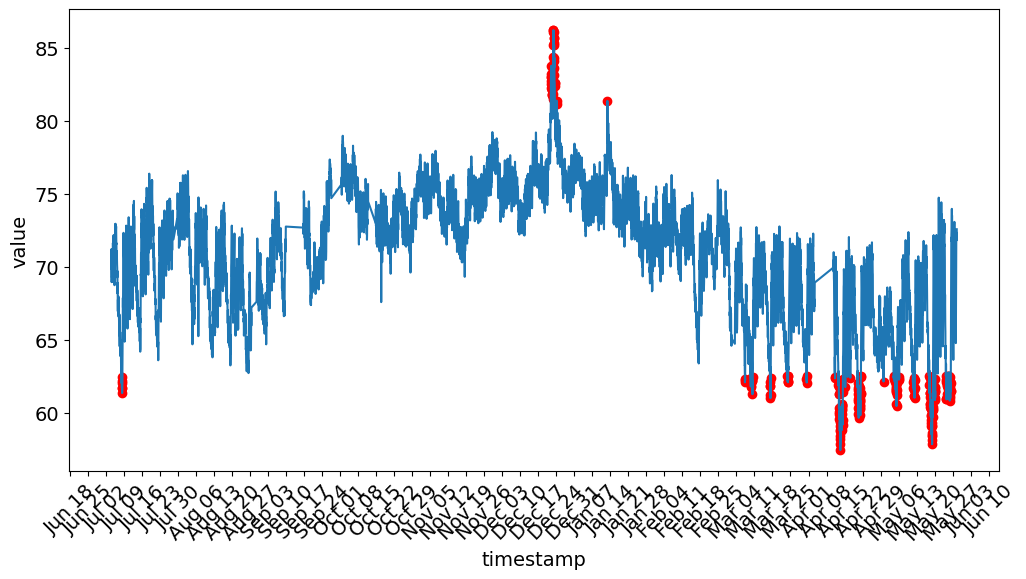

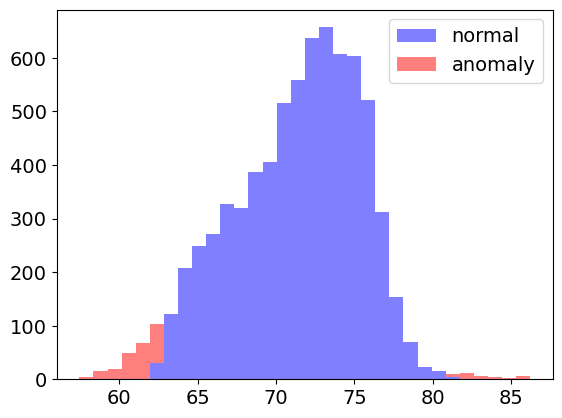

/Users/nassirmohammad/projects/anomaly_detection/perception-nassir/Notebooks/../scripts/utilities.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x=time_column, y=column_name, data=df, ci=None)
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


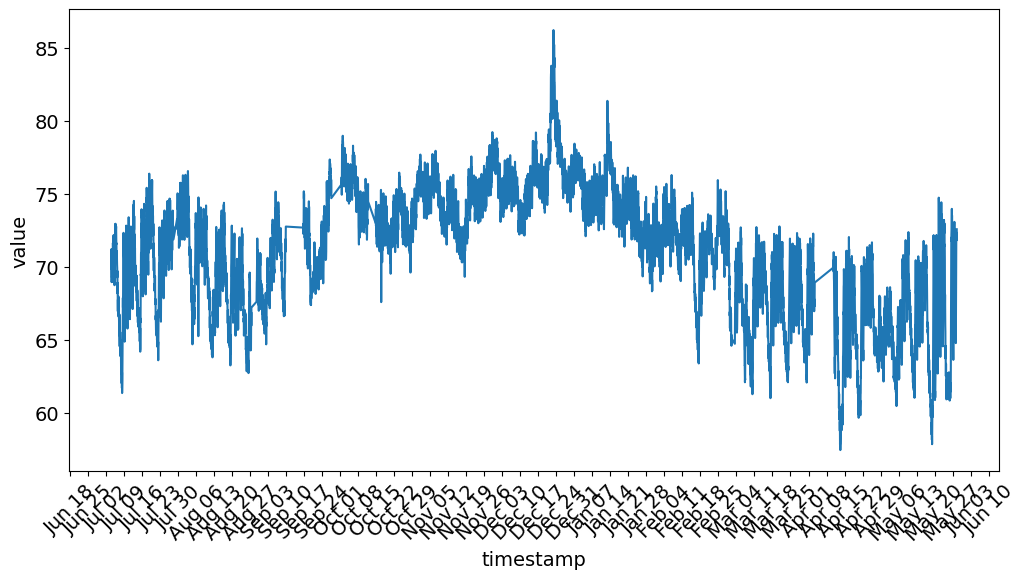

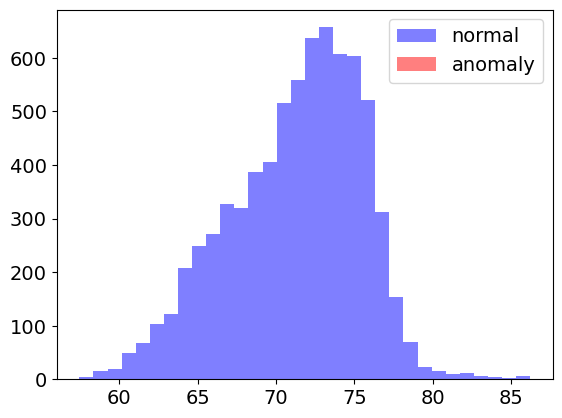

In [78]:
show_anomalies(ambient_df, results, 'label_perception',
               alg_name='perception_method')

show_anomalies(ambient_df, results, 'label_mad',
               alg_name='mad_method')

In [79]:
label_names = ['label_perception', 'label_z_2.5',
               'label_z_3', 'label_mad', 'label_iqr']
method_names = ['perception_method', 'z_score_2_5_method',
                'z_score_3_method', 'mad_method', 'iqr_method']

for algorithm_label, alg_name in zip(label_names, method_names):
    ambient_df[algorithm_label] = (ambient_df['value'].isin(results.loc[alg_name])).astype(int)
    
column_name = 'value'

In [80]:
perception_upper = ambient_df[ambient_df['value'] > np.median(ambient_df['value'])].groupby('label_perception')[column_name].min()[1]
perception_lower = ambient_df[ambient_df['value'] < np.median(ambient_df['value'])].groupby('label_perception')[column_name].max()[1]

z_25_upper = ambient_df[ambient_df['value'] > np.median(ambient_df['value'])].groupby('label_z_2.5')[column_name].min()[1]
z_25_lower = ambient_df[ambient_df['value'] < np.median(ambient_df['value'])].groupby('label_z_2.5')[column_name].max()[1]

z_3_upper = ambient_df[ambient_df['value'] > np.median(ambient_df['value'])].groupby('label_z_3')[column_name].min()[1]
z_3_lower = ambient_df[ambient_df['value'] < np.median(ambient_df['value'])].groupby('label_z_3')[column_name].max()[1]

iqr_upper = ambient_df[ambient_df['value'] > np.median(ambient_df['value'])].groupby('label_iqr')[column_name].min()[1]
iqr_lower = ambient_df[ambient_df['value'] < np.median(ambient_df['value'])].groupby('label_iqr')[column_name].max()[1]

In [81]:
print("perception: {}, {}".format(perception_upper, perception_lower))
print("z_2_5: {}, {}".format(z_25_upper, z_25_lower))
print("z_3: {}, {}".format(z_3_upper, z_3_lower))
print("iqr: {}, {}".format(iqr_upper, iqr_lower))

perception: 81.14245049, 62.56461867
z_2_5: 82.09190101, 60.6068837
z_3: 84.08697057, 58.42363855
iqr: 83.65396808, 59.20245134


/var/folders/h9/fky_jq090mz06d8w_73djt340000gn/T/ipykernel_9635/2899336680.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x="timestamp", y="value", data=ambient_df, ci=None)
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


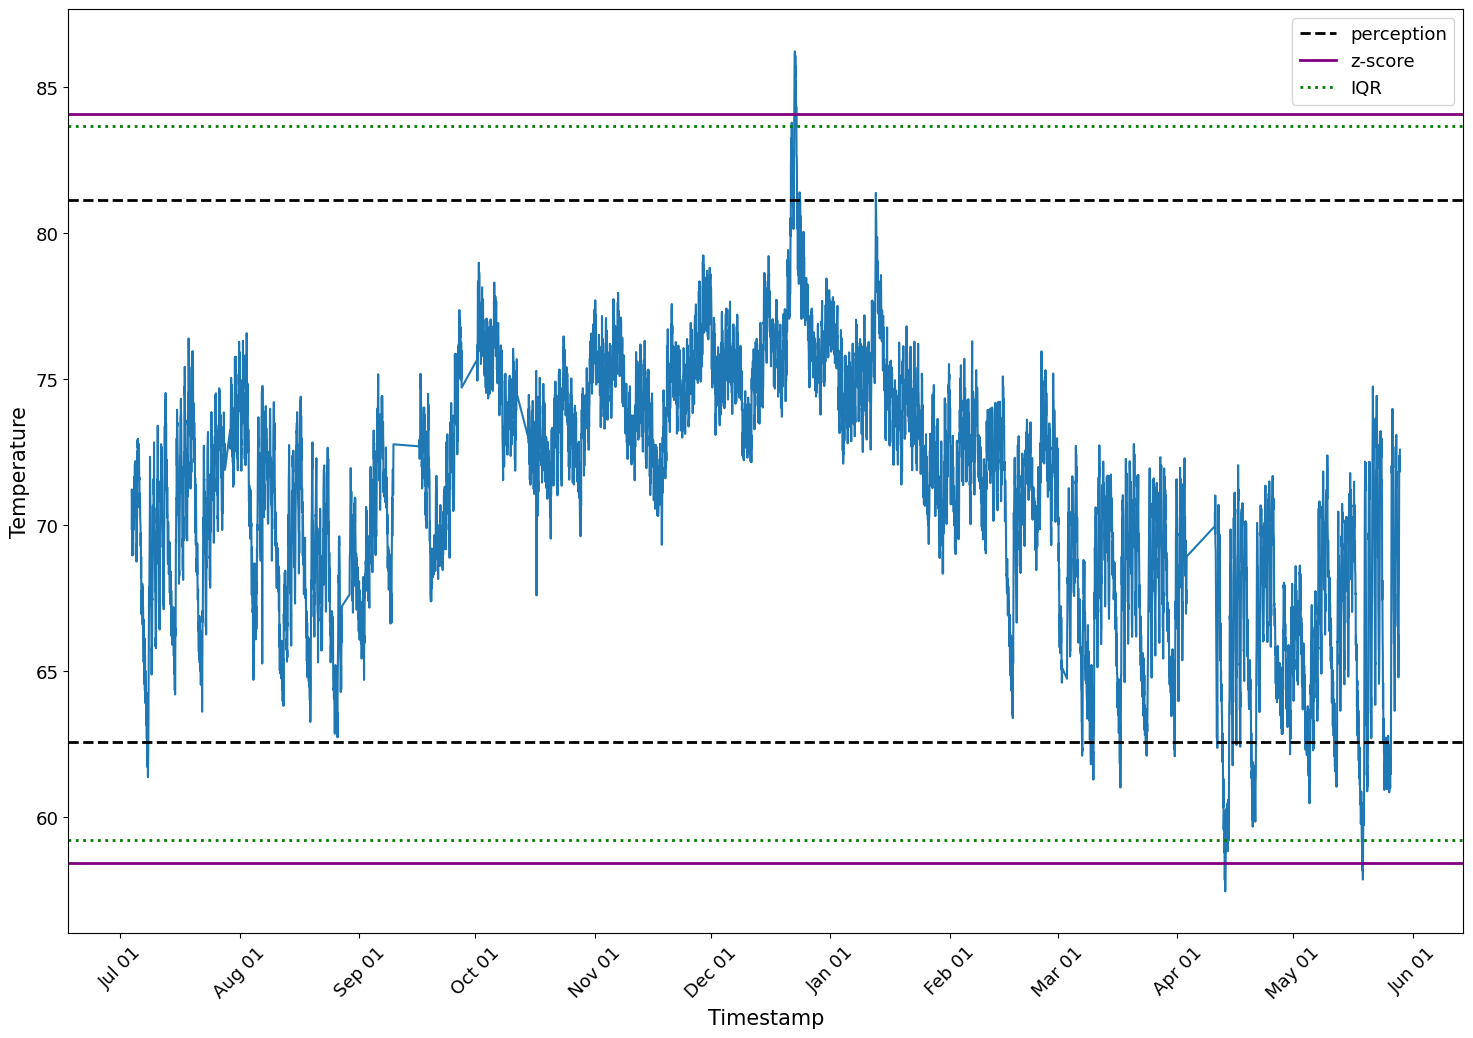

In [82]:
plt.rcParams["font.size"] = "13"

fig, ax = plt.subplots(figsize=(18,12))

ax = sns.lineplot(x="timestamp", y="value", data=ambient_df, ci=None)

# rotate the labels
ax.tick_params(axis='x', rotation=45)

#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())

# #set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

ax.axhline(y=perception_upper, linewidth=2, color='black', linestyle='--', label='perception')
#ax.axhline(y=z_25_upper, linewidth=2, color='red', label='Z-score 2.5')
ax.axhline(y=z_3_upper, linewidth=2, color='purple', linestyle='-', label='z-score')
# ax.axhline(y=mad_threshold_max[1], linewidth=2, color='orange', label='Modified Z-score')
ax.axhline(y=iqr_upper, linewidth=2, color='green', linestyle=':', label='IQR')

ax.axhline(y=perception_lower, linewidth=2, color='black', linestyle='--',)
#ax.axhline(y=z_25_lower, linewidth=2, color='red', linestyle='-',)
ax.axhline(y=z_3_lower, linewidth=2, color='purple', linestyle='-',)
# ax.axhline(y=mad_threshold_max[1], linewidth=2, color='orange', label='Modified Z-score')
ax.axhline(y=iqr_lower, linewidth=2, color='green', linestyle=':',)

#ax.axhline(y=np.median(ambient_df['value']), linewidth=2, color='pink')

#ax.scatter(known_ambient_df['timestamp'],known_ambient_df['value'], color='red')
ax.legend()
#plt.title('Ambient office temperature', fontsize=18)

plt.xlabel('Timestamp', fontsize=15)
plt.ylabel('Temperature', fontsize=15)

if image_save_switch is True:
    plt.savefig(image_save_path + 'ambient_temperature.png');

/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


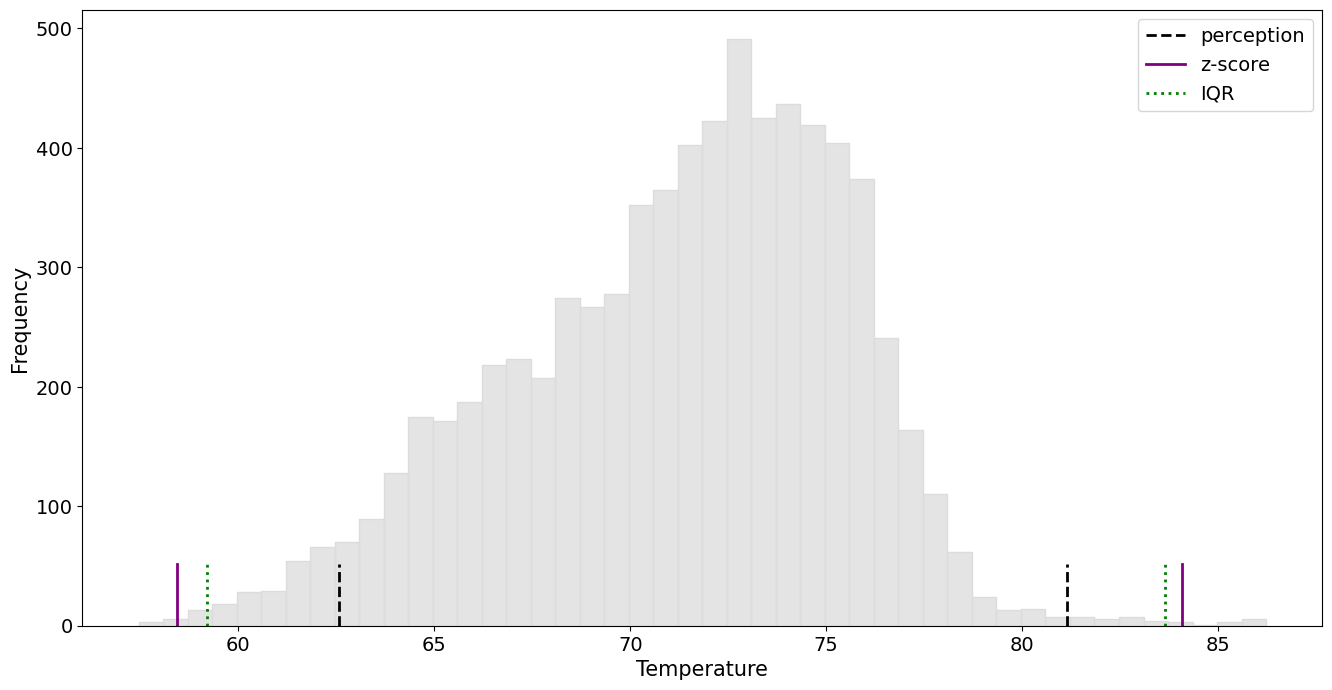

In [83]:
plt.rcParams["font.size"] = "14"

fig, ax = plt.subplots(figsize=(16, 8))

ax = sns.histplot(ambient_df['value'], kde=False,
                  color='gainsboro', edgecolor='gainsboro')

ax.axvline(x=perception_upper, ymax = 0.1, linewidth=2, color='black', label='perception', linestyle='--',)
#ax.axvline(x=z_25_upper, ymax = 0.1, linewidth=2, color='red', label='Z-score 2.5')
ax.axvline(x=z_3_upper, ymax = 0.1, linewidth=2, color='purple', label='z-score', linestyle='-',)
ax.axvline(x=iqr_upper, ymax = 0.1, linewidth=2, color='green', label='IQR', linestyle=':',)
#ax.axvline(x=np.median(ambient_df['value']), ymax = 0.1, linewidth=2, color='pink', label='Median')

ax.axvline(x=perception_lower, ymax = 0.1, linewidth=2, color='black', linestyle='--',)
#ax.axvline(x=z_25_lower, ymax = 0.1, linewidth=2, color='red', label='Z-score 2.5')
ax.axvline(x=z_3_lower, ymax = 0.1, linewidth=2, color='purple', linestyle='-',)
ax.axvline(x=iqr_lower, ymax = 0.1, linewidth=2, color='green', linestyle=':',)
#ax.axvline(x=np.median(ambient_df['value']), ymax = 0.1, linewidth=2, color='pink', label='Median')

ax.legend(loc='upper right')
#plt.title('Ambient office temperature', fontsize=18)

plt.xlabel('Temperature', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

if image_save_switch is True:
    plt.savefig(image_save_path + 'ambient_temperature_dist.png');


# Tweets and AdExchange

In [84]:
ads_exchange_path = "../data/"
cpu_path = ads_exchange_path + "exchange-4_cpm_results.csv"

# import the dataframe
cpu_df = pd.read_csv(cpu_path, engine='c', parse_dates=['timestamp'])
cpu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643 entries, 0 to 1642
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1643 non-null   datetime64[ns]
 1   value      1643 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.8 KB


/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


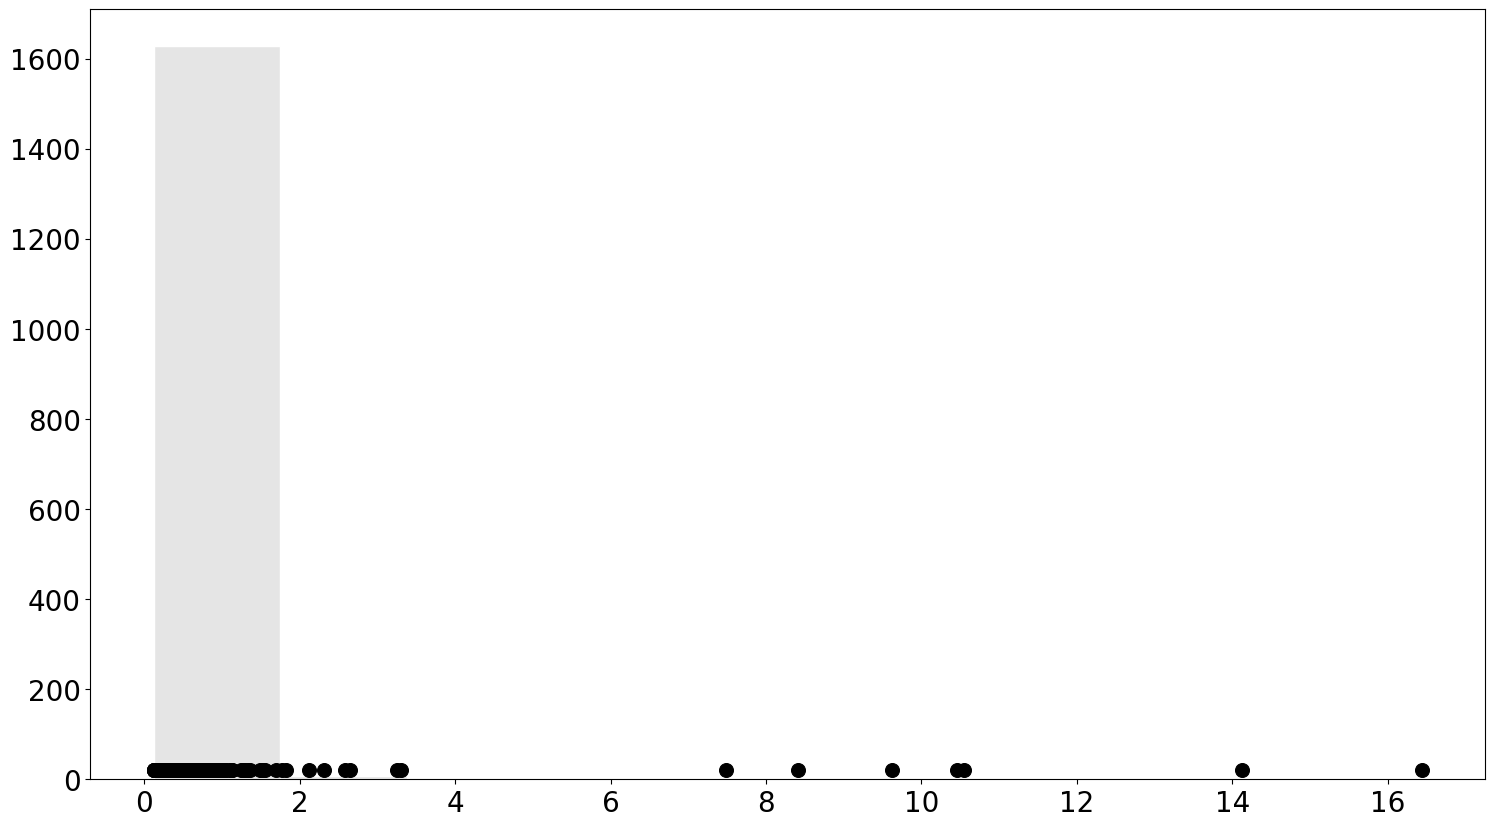

/var/folders/h9/fky_jq090mz06d8w_73djt340000gn/T/ipykernel_9635/1925278536.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x="timestamp", y="value", data=cpu_df, ci=None)
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


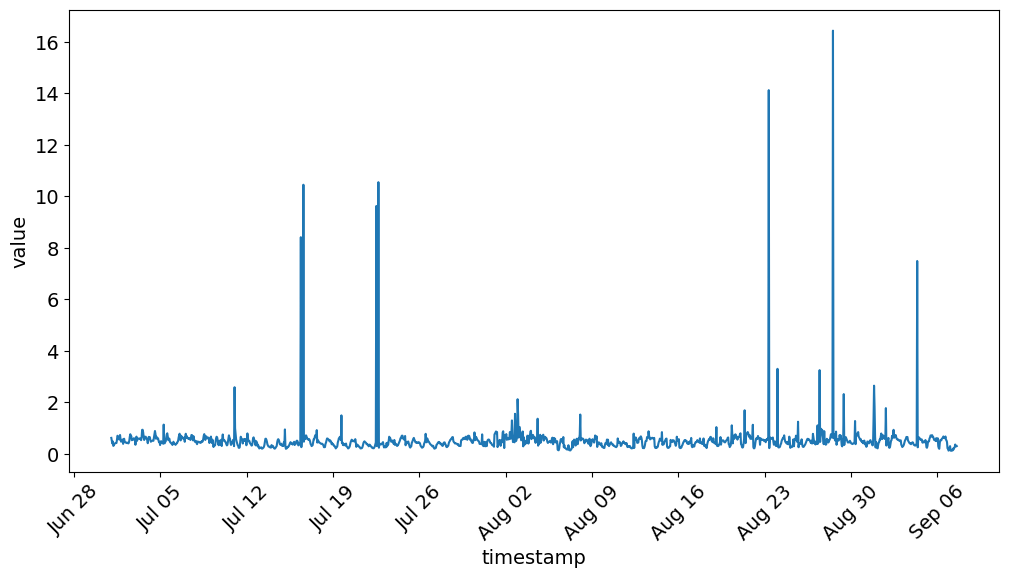

In [85]:
plot_data(cpu_df['value'], balls_height=20)

fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.lineplot(x="timestamp", y="value", data=cpu_df, ci=None)

# rotate the labels
ax.tick_params(axis='x', rotation=45)
# set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
# set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [86]:
vals = np.array(cpu_df['value'])
results = apply_methods(vals)

/Users/nassirmohammad/projects/anomaly_detection/perception-nassir/Notebooks/../scripts/utilities.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x=time_column, y=column_name, data=df, ci=None)
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


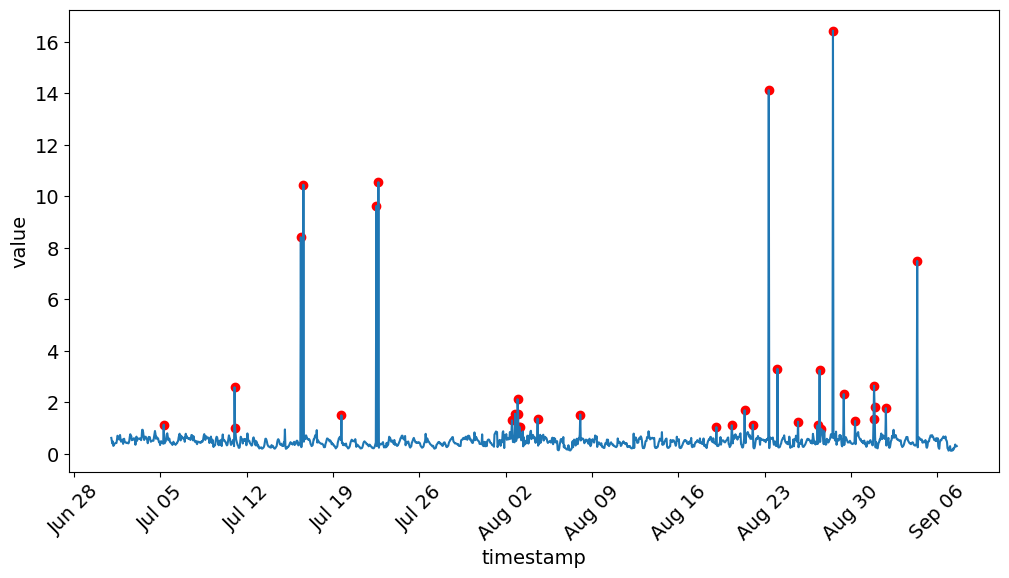

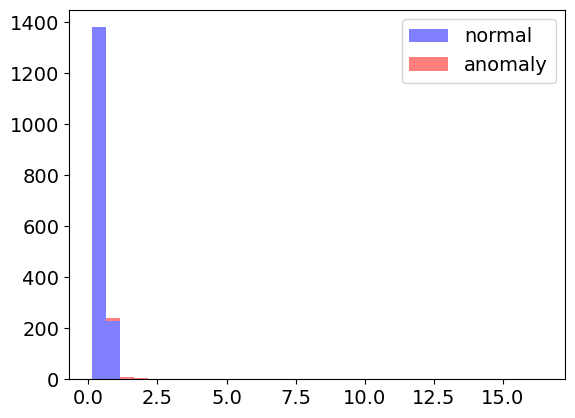

/Users/nassirmohammad/projects/anomaly_detection/perception-nassir/Notebooks/../scripts/utilities.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x=time_column, y=column_name, data=df, ci=None)
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


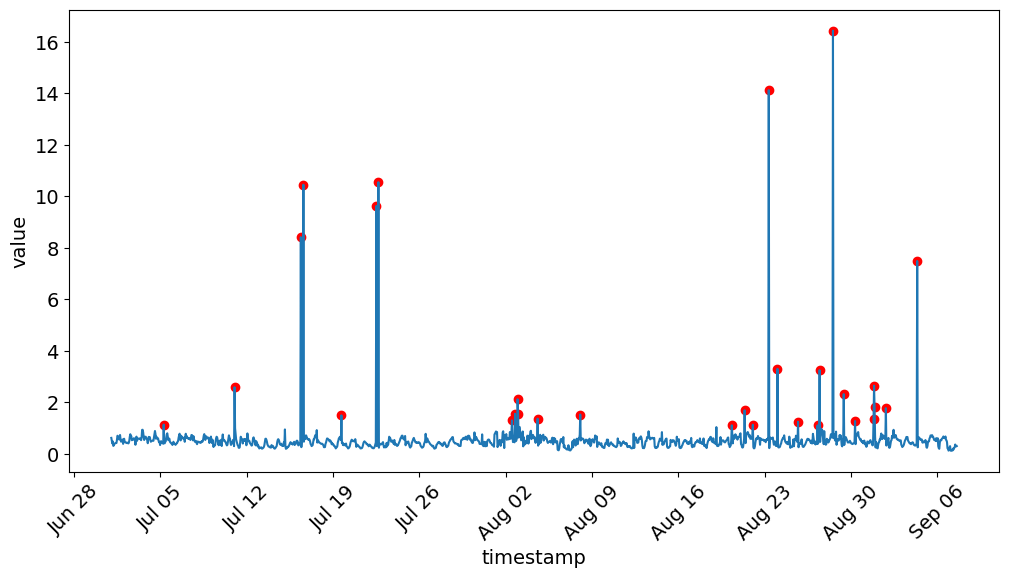

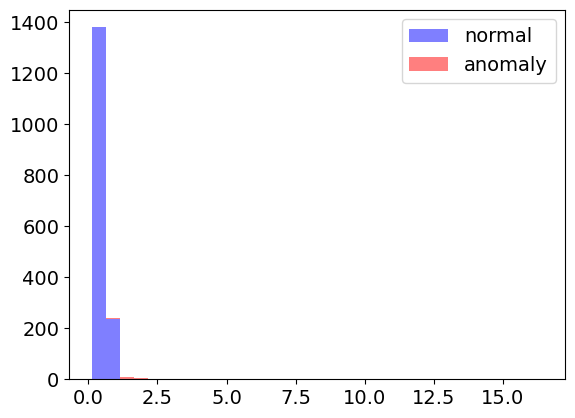

In [87]:
# %% plot anomalies results
show_anomalies(cpu_df, results, 'label_perception',
               alg_name='perception_method')

show_anomalies(cpu_df, results, 'label_mad',
               alg_name='mad_method')

In [88]:
label_names = ['label_perception', 'label_z_2.5',
               'label_z_3', 'label_mad', 'label_iqr']
method_names = ['perception_method', 'z_score_2_5_method',
                'z_score_3_method', 'mad_method', 'iqr_method']

for algorithm_label, alg_name in zip(label_names, method_names):
    cpu_df[algorithm_label] = (cpu_df['value'].isin(results.loc[alg_name])).astype(int)
    
column_name = 'value'

In [89]:
perception_upper = cpu_df[cpu_df['value'] > np.median(cpu_df['value'])].groupby('label_perception')[column_name].min()[1]
#our_lower = cpu_df[cpu_df['value'] < np.median(cpu_df['value'])].groupby('label_our')[column_name].max()[0]

z_25_upper = cpu_df[cpu_df['value'] > np.median(cpu_df['value'])].groupby('label_z_2.5')[column_name].min()[1]
#z_25_lower = cpu_df[cpu_df['value'] < np.median(cpu_df['value'])].groupby('label_z_2.5')[column_name].max()[0]

mad_upper = cpu_df[cpu_df['value'] > np.median(cpu_df['value'])].groupby('label_mad')[column_name].min()[1]

z_3_upper = cpu_df[cpu_df['value'] > np.median(cpu_df['value'])].groupby('label_z_3')[column_name].min()[1]
#z_3_lower = cpu_df[cpu_df['value'] < np.median(cpu_df['value'])].groupby('label_z_3')[column_name].max()[0]

iqr_upper = cpu_df[cpu_df['value'] > np.median(cpu_df['value'])].groupby('label_iqr')[column_name].min()[1]
#iqr_lower = cpu_df[cpu_df['value'] < np.median(cpu_df['value'])].groupby('label_iqr')[column_name].max()[0]

In [90]:
print("Perception: {}".format(perception_upper))
print("z_2_5: {}".format(mad_upper))
print("z_3: {}".format(z_3_upper))
print("iqr: {}".format(iqr_upper))

Perception: 0.972121624218
z_2_5: 1.10435815482
z_3: 3.25033821709
iqr: 0.927266508164


/var/folders/h9/fky_jq090mz06d8w_73djt340000gn/T/ipykernel_9635/2848137920.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x="timestamp", y="value", data=cpu_df, ci=None)
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


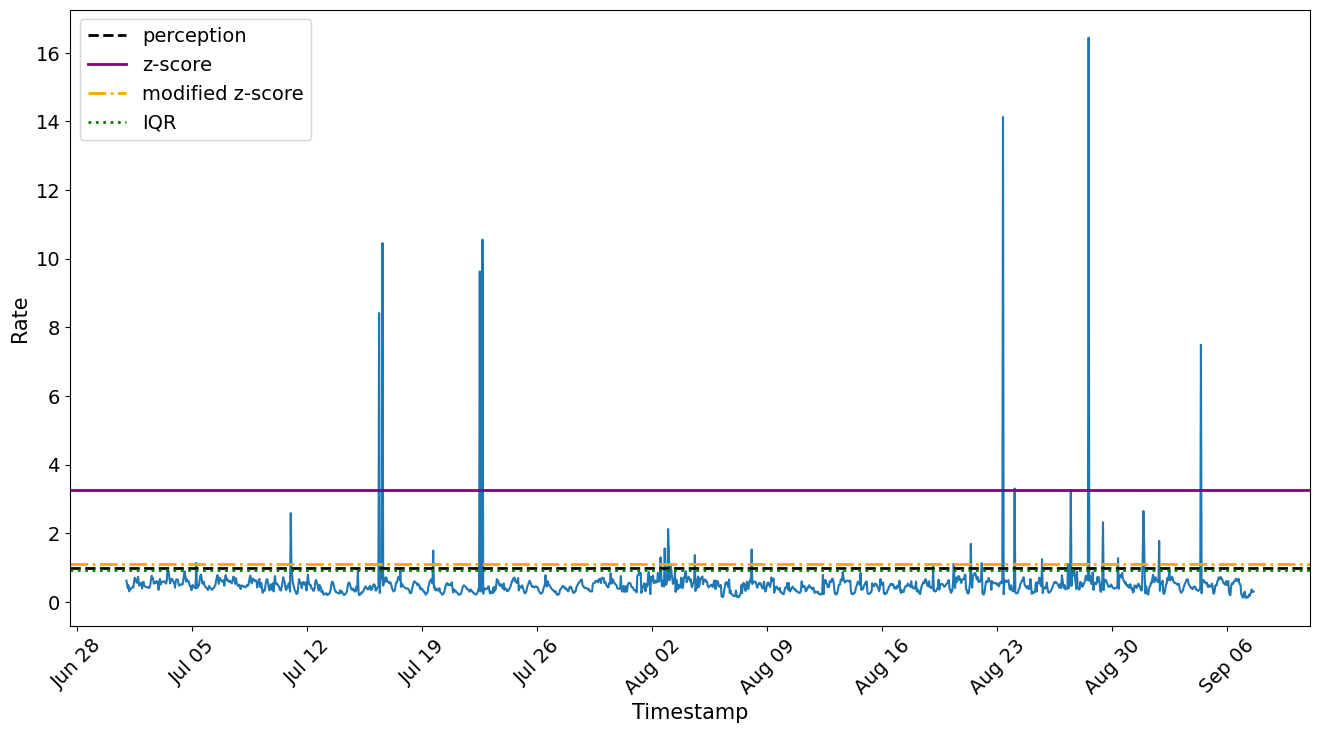

In [91]:
plt.rcParams["font.size"] = "14"
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.lineplot(x="timestamp", y="value", data=cpu_df, ci=None)

# rotate the labels
ax.tick_params(axis='x', rotation=45)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

ax.axhline(y=perception_upper, linewidth=2, color='black', linestyle='--', label='perception')
#ax.axhline(y=z_25_upper, linewidth=2, color='red', label='Z-score 2.5')
ax.axhline(y=z_3_upper, linewidth=2, color='purple', linestyle='-', label='z-score')
ax.axhline(y=mad_upper, linewidth=2, color='orange', linestyle='-.', label='modified z-score')
ax.axhline(y=iqr_upper, linewidth=2, color='green', linestyle=':', label='IQR')

#ax.scatter(known_cpu_df['timestamp'],known_cpu_df['value'], color='red')
ax.legend()

#plt.title('Online advertisement clicking rates', fontsize=18)
plt.xlabel('Timestamp', fontsize=15)
plt.ylabel('Rate', fontsize=15)

if image_save_switch is True:
    plt.savefig(image_save_path + 'adexchange_4.png');


/Users/nassirmohammad/anaconda3/envs/conda_arm1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


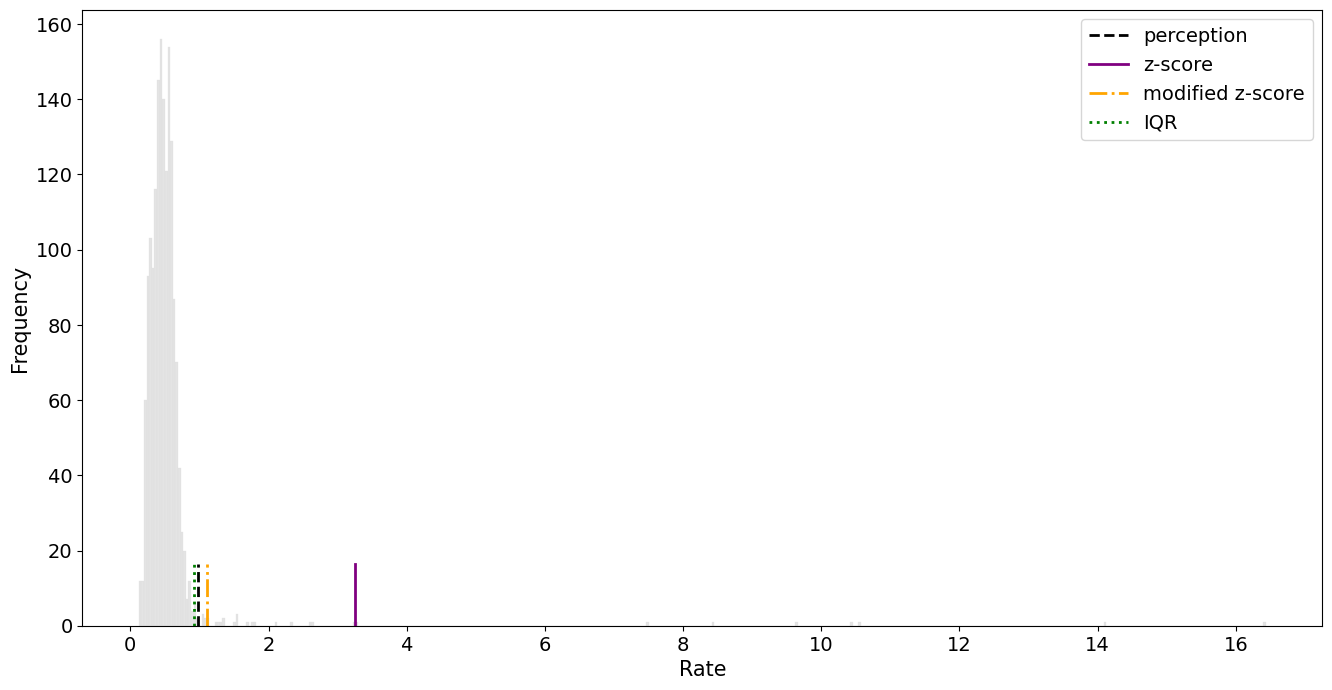

In [92]:
plt.rcParams["font.size"] = "14"

fig, ax = plt.subplots(figsize=(16, 8))

ax = sns.histplot(cpu_df['value'], kde=False,
                  color='gainsboro', edgecolor='gainsboro')

#plt.title('Online advertisement clicking rates', fontsize=18)
plt.xlabel('Rate', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

#ax.axvline(x=z_threshold_25_max[1], ymax = 0.1, linewidth=2, color='red', label='Z-score 2.5')
ax.axvline(x=perception_upper, ymax = 0.1, linewidth=2, color='black', linestyle='--', label='perception')
ax.axvline(x=z_3_upper, ymax = 0.1, linewidth=2, color='purple', linestyle='-', label='z-score')
ax.axvline(x=mad_upper, ymax = 0.1, linewidth=2, color='orange', linestyle='-.', label='modified z-score')
ax.axvline(x=iqr_upper, ymax = 0.1, linewidth=2, color='green', linestyle=':', label='IQR')

#ax.axvline(x=np.median(machine_df['value']), ymax = 0.1, linewidth=2, color='pink', label='Median')
ax.legend(loc='upper right');

if image_save_switch is True:
    plt.savefig(image_save_path + 'adexchange_4_dist.png');